<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Data**

In [2]:
raw_csv_data= pd.read_csv('/content/Index2018.csv')
raw_csv_data.head()


,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df = raw_csv_data.copy()

### **Examining the Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [5]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### **Plotting the Data**

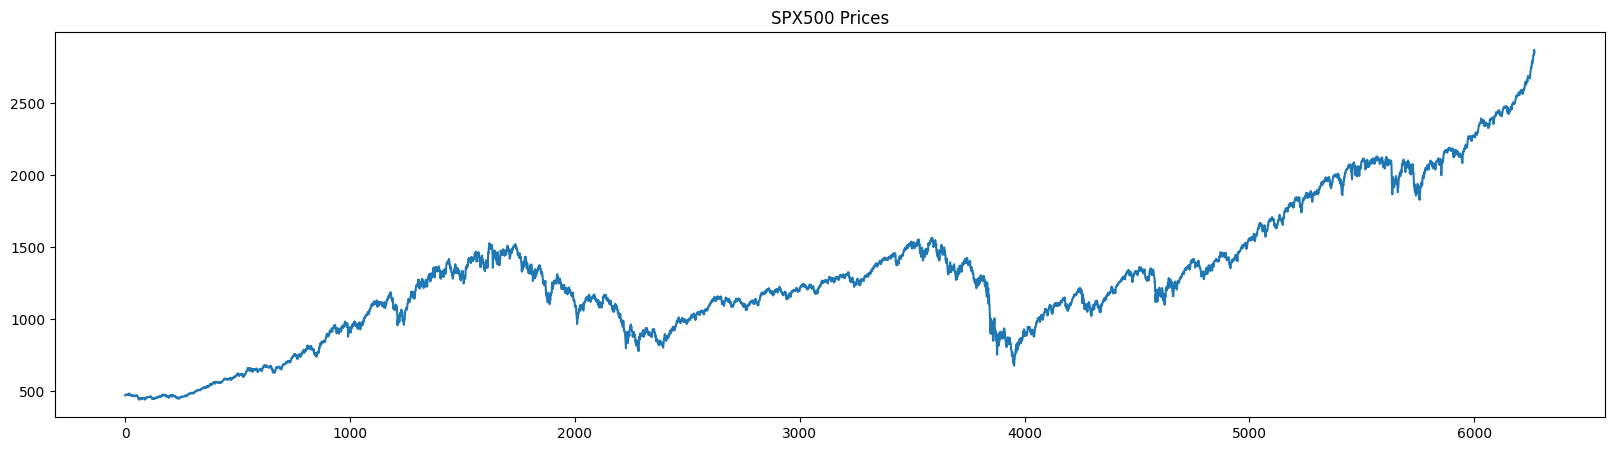

In [7]:
df.spx.plot(figsize=(20, 5), title='SPX500 Prices')
plt.show()

Price fluctuates: there are periods of booming growth followed by sharp falls.

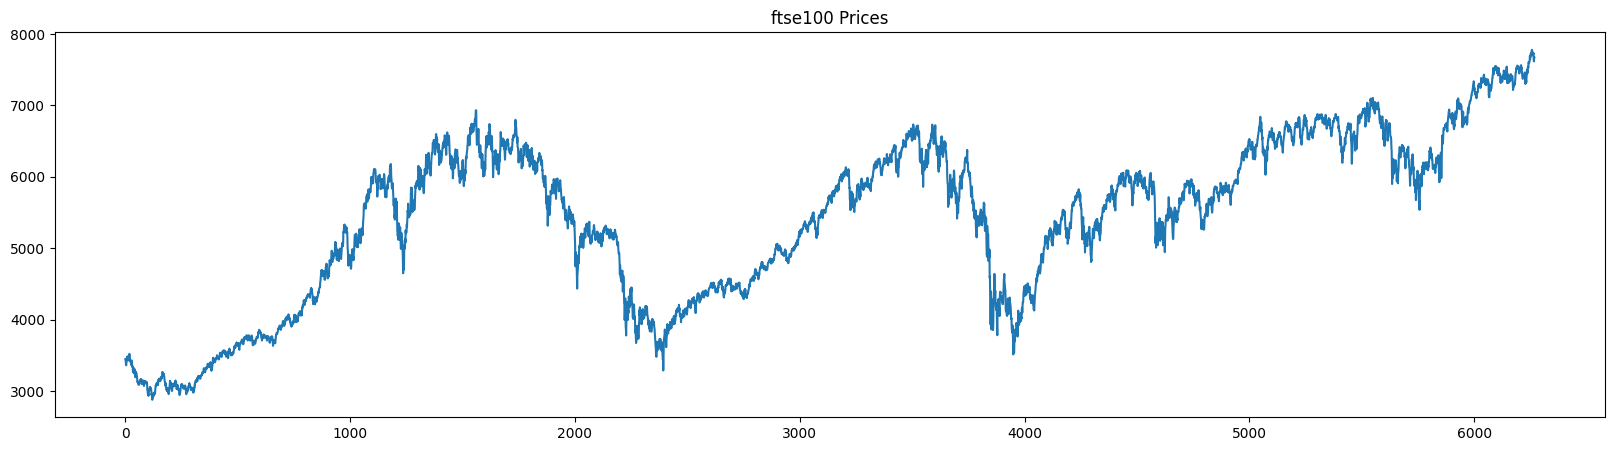

In [8]:
df.ftse.plot(figsize=(20, 5), title='ftse100 Prices')
plt.show()

Similar patterns

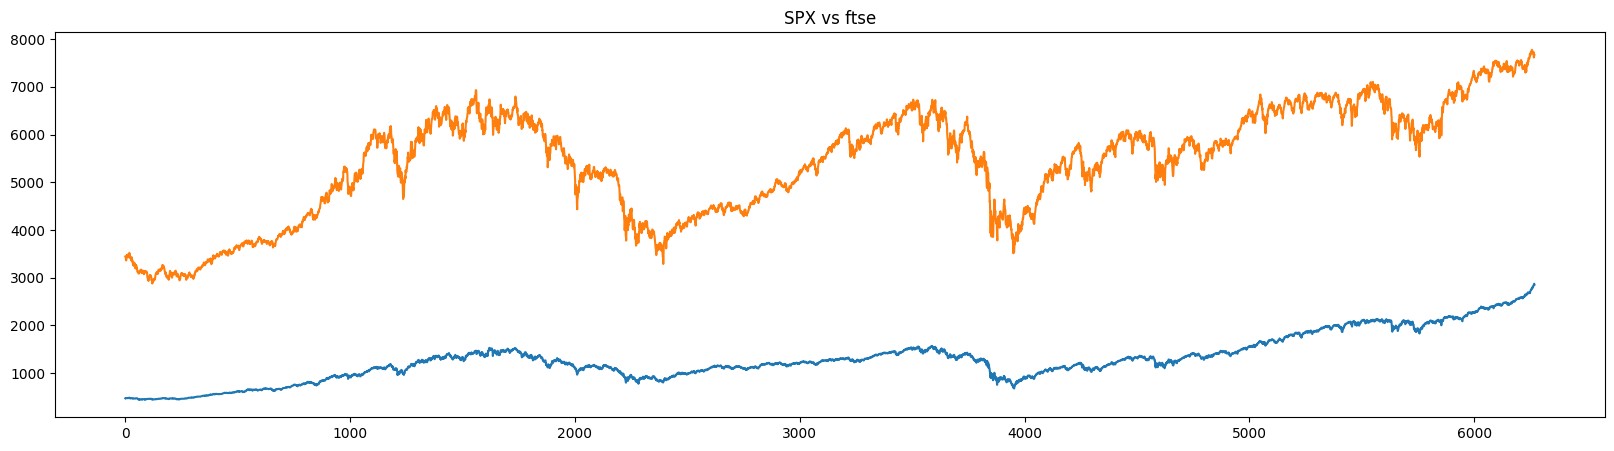

In [9]:
df.spx.plot(figsize=(20, 5), title='SPX500 Prices')
df.ftse.plot(figsize=(20, 5), title='ftse100 Prices')
plt.title('SPX vs ftse')
plt.show()

False: SPX looks much flatter than ftse suggesting SPX could be much more flatter than ftse.
The SPX and ftse have different magnitudes

### **The QQ Plot**

Quantile-Quantile Plot(QQ Plot)
Used to determine whether a dataset is distributed in a certain way.
Usually show cases how the data fits a normal distribution.

In [10]:
import scipy.stats
import pylab

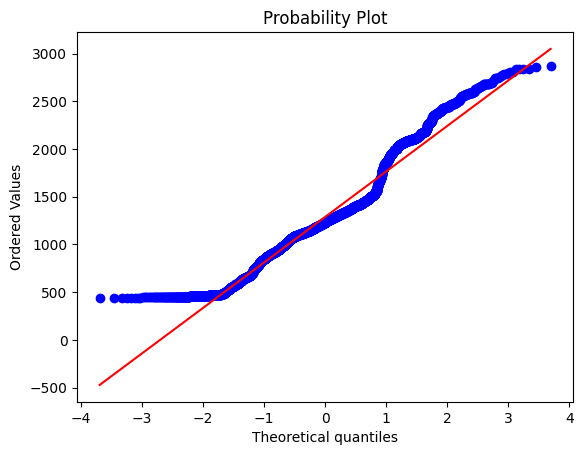

In [11]:
scipy.stats.probplot(df.spx, plot=pylab)
pylab.show()

What the data poins should follow, if they are normally distributed.
How many standard deviations away from the mean these values are.

### **Length of the Time Period**

In [12]:
df.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

### **From Text to Date**

In [13]:
#pd.to_datetime assumes we are plugging in a string 'mm/dd/yyyy' form yet our data is saved in the format 'dd/mm/yy'
df.date = pd.to_datetime(df.date, dayfirst=True)

In [14]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [15]:
df.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

### **Setting the index**

In [16]:
df.set_index('date', inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### *Setting Frequency**

Time series data requires a constant frequency

In [19]:
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### **Handling missing values**

In [20]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [22]:
df.spx = df.spx.fillna(method = 'ffill')

In [23]:
df.isnull().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [24]:
df.ftse = df.ftse.fillna(method = 'bfill')

In [25]:
df.nikkei  = df.nikkei .fillna(method = 'ffill')

In [26]:
df.dax = df.dax.fillna(value = df.dax.mean())

In [27]:
df.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### **Simplifying the Dataset**

In [28]:
df['market_value'] = df.spx

In [29]:
df.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,1288.642547
std,487.868210,2752.604984,1145.568370,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [31]:
del df['spx'], df['dax'], df['ftse'], df['nikkei']

In [32]:
df.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### **Splitting the Data**

Time series relies on keeping the chronological order of the values in the dataset

In [33]:
size = int(len(df)*0.8)
train, test = df.iloc[:size], df.iloc[size:]

In [34]:
train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [35]:
test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### **White Noise**

In [38]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [39]:
df['wn'] = wn

In [41]:
df.describe()

,market_value,wn
count,6277.000000,6277.000000
mean,1288.642547,1280.030480
std,487.868210,481.647741
min,438.920000,-639.451651
25%,992.715221,957.543177
50%,1233.761241,1281.682769
75%,1460.250000,1601.830221
max,2872.867839,3082.494047


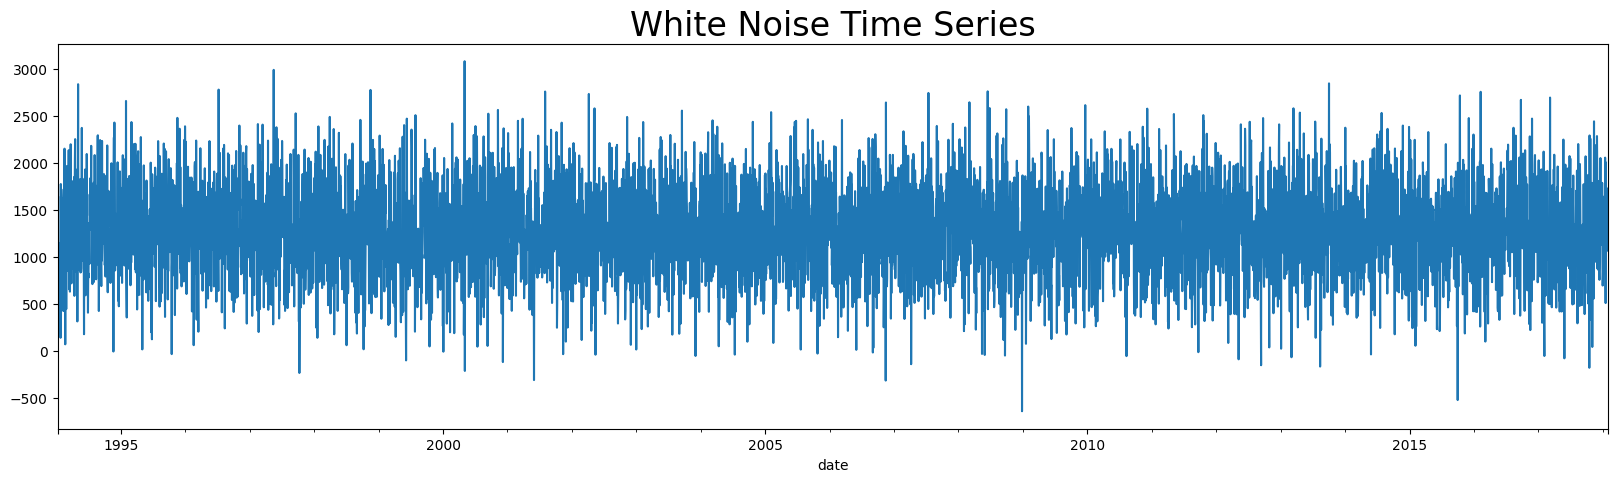

In [43]:
df.wn.plot(figsize = (20, 5))
plt.title('White Noise Time Series', size=24)
plt.show()

In [ ]:
df.market_value.plot(figsize = (20, 5))
plt.title('S&P Prices', size=24)
plt.show()